In [15]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *
from sklearn.utils import shuffle


In [16]:

img_rows, img_cols = 200, 200
img_channels = 1


In [3]:
#data
path1 = "C:\\Users\\Prathyusha.segu\\Desktop\\CIE\\train_set"   
path2 = "C:\\Users\\Prathyusha.segu\\Desktop\\CIE\\input_data_resized"     

listing = os.listdir(path1)
num_samples=size(listing)
print (num_samples)

for file in listing:
    im = Image.open(path1 + '\\' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')        
    gray.save(path2 +'\\' +  file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open('input_data_resized' + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2]
imnbr = len(imlist) 


46


(46, 40000)
(46,)


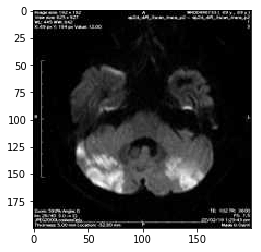

In [4]:

immatrix = array([array(Image.open('input_data_resized'+ '\\' + im2)).flatten()
              for im2 in imlist],'f')
               
label=np.ones((num_samples,),dtype = int)
label[0]=0
label[1]=1
label[2]=2
label[3]=3
label[4]=4
label[5]=5
label[6]=6
label[7]=7
label[8]=8
label[9]=3
label[10]=10
label[11]=11
label[12]=12
label[13]=13
label[14]=14
label[15]=15
label[16]=16
label[17]=17
label[18]=18
label[19]=19
label[20]=20
label[21]=21
label[22]=22
label[23]=23
label[24]=24
label[25]=25
label[26]=26
label[27]=27
label[28]=28
label[29]=29
label[30]=30
label[31]=31
label[32]=32
label[33]=33
label[34]=34
label[35]=35
label[36]=36
label[37]=37
label[38]=38
label[39]=39
label[40]=40
label[41]=41
label[42]=42
label[43]=43
label[44]=44
label[45]=45


data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[1].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)


In [5]:

path3 = "C:\\Users\\Prathyusha.segu\\Desktop\\CIE\\test_set"      
path4 = "C:\\Users\\Prathyusha.segu\\Desktop\\CIE\\test_data_resize" 

listing1 = os.listdir(path3)
num_samples1=size(listing1)
print (num_samples1)

for file in listing1:
    im = Image.open(path3 + '\\' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')         
    gray.save(path4 +'\\' +  file, "JPEG")

imlist1 = os.listdir(path4)

im3 = array(Image.open('test_data_resize' + '\\'+ imlist1[0]))
m1,n1 = im3.shape[0:2]
imnbr1 = len(imlist1) 


4


(4, 40000)
(4,)


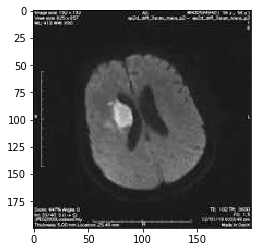

In [6]:

immatrix1 = array([array(Image.open('test_data_resize'+ '\\' + im3)).flatten()
              for im3 in imlist1],'f')
               
label1=np.ones((num_samples1,),dtype = int)
label1[0]=25
label1[1]=33
label1[2]=34
label1[3]=43



data1,Label1 = shuffle(immatrix1,label1, random_state=2)
test_data = [data1,Label1]

img=immatrix1[1].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (test_data[0].shape)
print (test_data[1].shape)


In [7]:



nb_epoch = 5
nb_filters = 32
nb_pool = 2
nb_conv = 3
batch_size = 10
nb_classes = 46

In [8]:
(X_train, y_train) = (train_data[0],train_data[1])
(X_test, y_test) = (test_data[0],test_data[1])

In [9]:

X_train = X_train.reshape(X_train.shape[0],  img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (46, 200, 200, 1)
46 train samples
4 test samples


In [10]:

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [17]:
model = Sequential()
model.add(Convolution2D(32,(3,3) ,input_shape=(img_rows, img_cols,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64,(3,3), input_shape=(img_rows, img_cols,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128,(3,3), input_shape=(img_rows, img_cols,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128,(3,3), input_shape=(img_rows, img_cols,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
plot_model(model, to_file='model.png')





ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
               verbose=1, validation_data=(X_test, Y_test))
#hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
 #              verbose=1, validation_split=0.2)
#verbose is just to define how u want to see the traning of the model

Instructions for updating:
Use tf.cast instead.
Train on 46 samples, validate on 4 samples
Epoch 1/5
46/46 [==============================] - 5s 110ms/step - loss: 3.8675 - accuracy: 0.0217 - val_loss: 3.8193 - val_accuracy: 0.2500
Epoch 2/5
46/46 [==============================] - 4s 91ms/step - loss: 3.8318 - accuracy: 0.0000e+00 - val_loss: 3.8308 - val_accuracy: 0.0000e+00
Epoch 3/5
46/46 [==============================

['seaborn-muted', 'seaborn-dark-palette', 'grayscale', 'tableau-colorblind10', 'seaborn-dark', 'seaborn-white', 'seaborn-ticks', 'classic', 'seaborn-bright', 'Solarize_Light2', 'ggplot', 'seaborn', 'seaborn-deep', '_classic_test', 'dark_background', 'fivethirtyeight', 'seaborn-talk', 'seaborn-darkgrid', 'bmh', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'fast', 'seaborn-poster', 'seaborn-colorblind', 'seaborn-whitegrid']


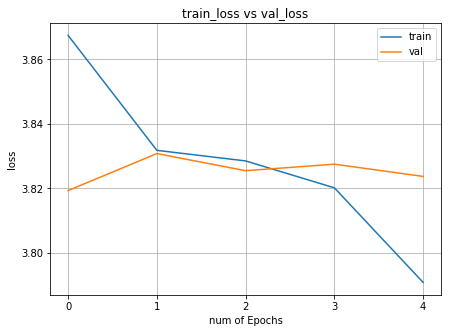

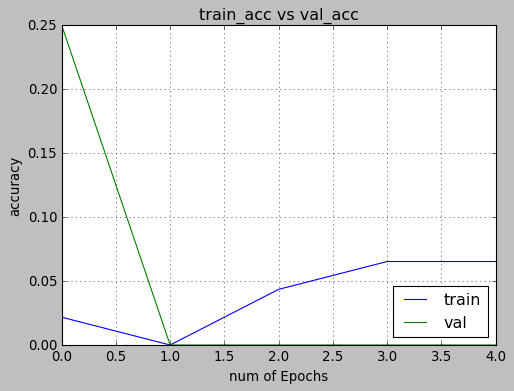

In [14]:
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:',score[1])
print(model.predict_classes(X_test[1:5]))
print(y_test[1:5])

Test score: 3.8542234897613525
Test accuracy: 0.0
[3 3 3]
[43 33 25]


In [ ]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

In [43]:
for i in X_test:
    print(model.predict(np.array(i)))

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (200, 200, 1)